In [404]:
import pandas_datareader.data as web
import pandas as pd
import bt
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
from tqdm import tqdm
import json

# 베타

In [28]:
# KOSPI200 ETF인 Tiger200과 전통적인 고배타주인 증권주(키움증권)의 관계를 분석
ticker = {
    'Tiger200': '102110',
    'Kiwoom': '039490'
}
prices = pd.concat([web.DataReader(tkr, 'naver', start='2016-01-01', end='2018-12-31')[['Close']]\
    .rename(columns={'Close': name})\
    for name, tkr in ticker.items()], axis=1)
prices = prices.applymap(float)
prices

,Tiger200,Kiwoom
Date,,
2016-01-04,20663.0,59800.0
2016-01-05,20789.0,61500.0
2016-01-06,20663.0,61100.0
2016-01-07,20427.0,59500.0
2016-01-08,20579.0,59700.0
...,...,...
2018-12-21,24399.0,76300.0
2018-12-24,24412.0,75800.0
2018-12-26,24063.0,74200.0


In [36]:
from statsmodels.formula.api import ols
ret = (prices - prices.shift(1))/prices.shift(1)
reg = ols('Kiwoom ~ Tiger200', data=ret).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Kiwoom   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     375.6
Date:                Mon, 27 Jun 2022   Prob (F-statistic):           8.10e-68
Time:                        20:39:15   Log-Likelihood:                 1847.2
No. Observations:                 732   AIC:                            -3690.
Df Residuals:                     730   BIC:                            -3681.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002      0.001      0.255      0.799      -0.001       0.002
Tiger200       1.7759      0.092     19.379      0.000       1.596       1.956
==============================================================================
Omnibus:                       81.652   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.038
Skew:                           0.668   Prob(JB):                     2.40e-36
Kurtosis:                       4.896   Cond. No.                         128.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 베타 시각화

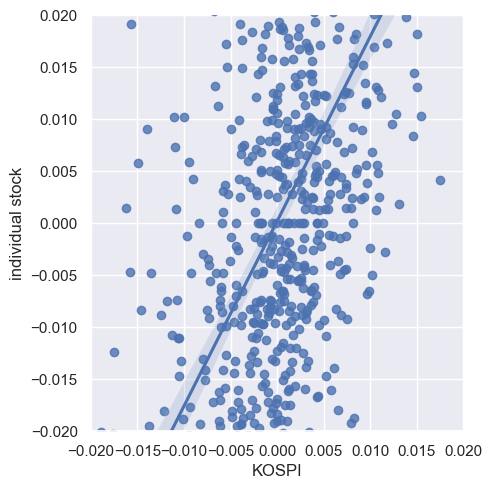

In [42]:
ax = sns.lmplot(data=ret, x='Tiger200', y='Kiwoom', )
ax.set(
    xlim=(-0.02, 0.02), ylim=(-0.02, 0.02),
    xlabel='KOSPI', ylabel='individual stock')
plt..

# 저변동성 효과

## 일간 저변동 포트폴리오

In [48]:
code_template = '{0:06d}'
KOR_ticker = pd.read_csv('data/KOR_ticker.csv', encoding='cp949')
KOR_ticker['종목코드'] = KOR_ticker['종목코드'].apply(lambda x: code_template.format(x))

prices = pd.DataFrame()
for i in tqdm(range(len(KOR_ticker)), total=len(KOR_ticker), ncols=50):
    code = KOR_ticker['종목코드'][i]
    prices = pd.concat(
        [prices,
        web.DataReader(
            code, 'naver', start='2021-01-01', end='2021-12-31')[['Close']]\
                .rename(columns={'Close': code})],
        axis=1)
prices

100%|█████████| 2268/2268 [05:18<00:00,  7.12it/s]


,005930,373220,000660,207940,051910,035420,006400,005380,000270,035720,...,038340,033790,101680,058220,078650,121890,058420,347140,050540,176440
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,83000,NaN,126000,819298,889000,293000,671000,207500,64000,79483,...,6600,829,1610,275,22427,739,2770,2055,2820,1920
2021-01-05,83900,NaN,130500,822263,893000,292500,686000,209500,63700,78881,...,6630,829,1600,275,22652,739,2490,2055,2820,1920
2021-01-06,82200,NaN,131000,807438,890000,290000,680000,203000,62200,79383,...,6945,829,1615,275,23103,739,2349,2050,2820,1920
2021-01-07,82900,NaN,134500,809415,962000,289500,698000,206000,63000,80788,...,6960,829,1605,275,22990,739,2223,2050,2820,1920
2021-01-08,88800,NaN,138000,827204,999000,312000,739000,246000,68300,87111,...,6885,829,1605,275,22540,739,2027,2050,2820,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,80500,NaN,128000,874642,621000,384000,651000,215500,85100,114500,...,1335,829,1440,275,7110,739,2160,2060,2820,1920
2021-12-27,80200,NaN,126000,875631,627000,380500,644000,213500,84800,113000,...,1335,829,1440,275,7010,739,2160,2065,2820,1920
2021-12-28,80300,NaN,127500,880572,632000,384500,651000,214000,84500,113500,...,1335,829,1440,275,6520,739,2160,2075,2820,1920


[Text(0.5, 0, 'std'), Text(0, 0.5, 'count')]

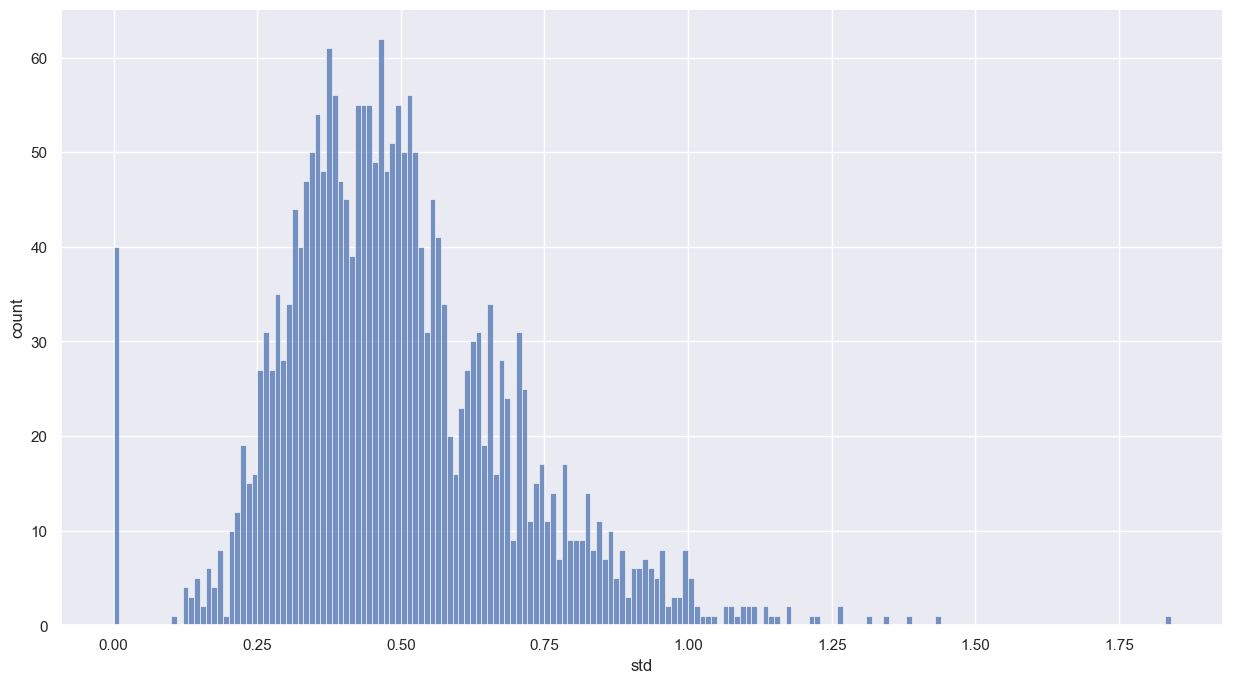

In [298]:
# 수익률
from math import sqrt
prices = prices.applymap(float)
ret = (prices - prices.shift(1)) / prices.shift(1)

# 연율화 변동성
std_12m_daily = ret.std(axis=0).dropna() * sqrt(len(ret))
ax = sns.histplot(x=std_12m_daily, binwidth=0.01)
ax.set(xlabel='std', ylabel='count')

In [299]:
# 변동성이 0인 종목은 거래정지로 인해 가격이 변하지 않음. -> NA 처리
import numpy as np
std_12m_daily[std_12m_daily==0] = np.nan

# 변동성 하위 30종목
std_12m_daily[std_12m_daily.rank(method='min', ascending=True, na_option='keep') <= 30]

033780    0.121014
012750    0.177843
007310    0.166531
016710    0.170122
001720    0.163343
034310    0.180910
267980    0.169483
005180    0.165060
029960    0.168872
034950    0.120706
000480    0.144165
002960    0.150822
072710    0.149284
293480    0.182720
001070    0.181557
001270    0.147832
015360    0.160831
092130    0.134193
003120    0.146106
018120    0.106347
130580    0.185224
040420    0.139846
332290    0.149014
034590    0.128464
078000    0.178185
006580    0.138531
004450    0.122866
033340    0.173871
014100    0.156733
084670    0.181789
dtype: float64

<AxesSubplot:>

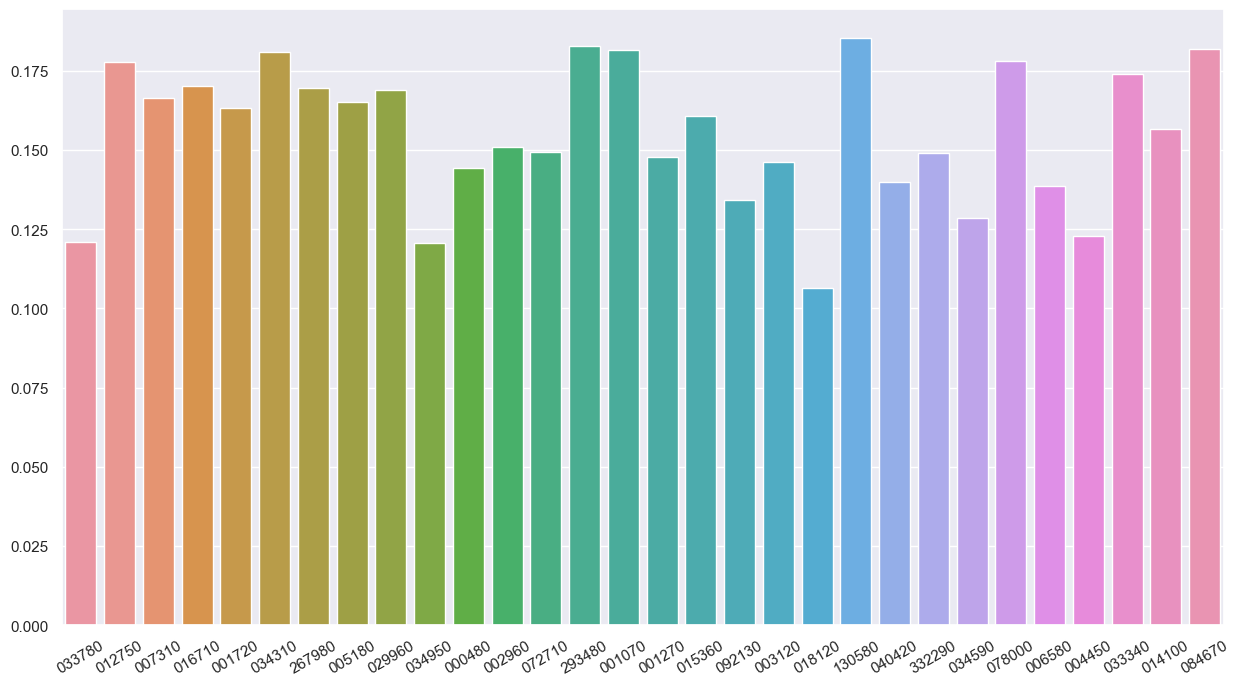

In [300]:
# 저변동성 종목 시각화
low_std_30 = std_12m_daily[std_12m_daily.rank(method='min', ascending=True, na_option='keep') <= 30]
g = sns.barplot(x=low_std_30.index, y=low_std_30)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
g

In [301]:
# 저변동 포트폴리오
low_std_30 = low_std_30.reset_index()
low_std_30.columns = ['종목코드', '일간 변동성']
low_std_30['종목명'] = KOR_ticker.set_index('종목코드').loc[low_std_30['종목코드'], '종목명'].tolist()
low_std_30

,종목코드,일간 변동성,종목명
0,033780,0.121014,KT&G
1,012750,0.177843,에스원
2,007310,0.166531,오뚜기
3,016710,0.170122,대성홀딩스
4,001720,0.163343,신영증권
5,034310,0.180910,NICE
6,267980,0.169483,매일유업
7,005180,0.165060,빙그레
8,029960,0.168872,코엔텍
9,034950,0.120706,한국기업평가


## 주간 저변동 포트폴리오

In [307]:
prices = pd.read_csv('data/KOR_price_2021.csv', encoding='cp949')
prices['Date'] = pd.to_datetime(prices['Date'])
prices = prices.set_index('Date')
prices

,005930,373220,000660,207940,051910,035420,006400,005380,000270,035720,...,038340,033790,101680,058220,078650,121890,058420,347140,050540,176440
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,83000,NaN,126000,819298,889000,293000,671000,207500,64000,79483,...,6600,829,1610,275,22427,739,2770,2055,2820,1920
2021-01-05,83900,NaN,130500,822263,893000,292500,686000,209500,63700,78881,...,6630,829,1600,275,22652,739,2490,2055,2820,1920
2021-01-06,82200,NaN,131000,807438,890000,290000,680000,203000,62200,79383,...,6945,829,1615,275,23103,739,2349,2050,2820,1920
2021-01-07,82900,NaN,134500,809415,962000,289500,698000,206000,63000,80788,...,6960,829,1605,275,22990,739,2223,2050,2820,1920
2021-01-08,88800,NaN,138000,827204,999000,312000,739000,246000,68300,87111,...,6885,829,1605,275,22540,739,2027,2050,2820,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,80500,NaN,128000,874642,621000,384000,651000,215500,85100,114500,...,1335,829,1440,275,7110,739,2160,2060,2820,1920
2021-12-27,80200,NaN,126000,875631,627000,380500,644000,213500,84800,113000,...,1335,829,1440,275,7010,739,2160,2065,2820,1920
2021-12-28,80300,NaN,127500,880572,632000,384500,651000,214000,84500,113500,...,1335,829,1440,275,6520,739,2160,2075,2820,1920


<AxesSubplot:xlabel='std', ylabel='count'>

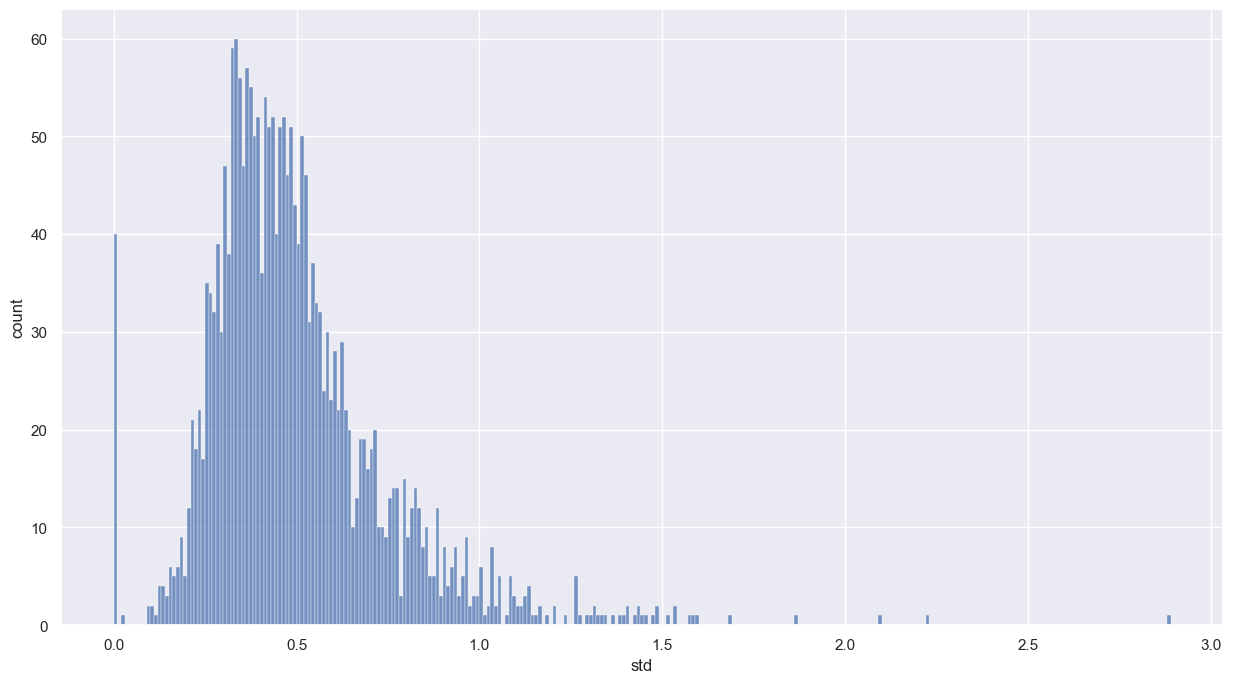

In [308]:
# https://medium.com/@richardhwlin/flexible-backtesting-with-bt-7295c0dde5dd
price_weekly = pd.concat([prices[:1], prices.asfreq('W', method='ffill'), prices[-1:]])
ret_weekly = price_weekly.pct_change()

# 연율화 변동성
std_12m_weekly = ret_weekly.std(axis=0).dropna() * sqrt(len(ret_weekly)-1)
ax = sns.histplot(x=std_12m_weekly, binwidth=0.01)
ax.set(xlabel='std', ylabel='count')
ax

<AxesSubplot:xlabel='종목코드', ylabel='주간 변동성'>

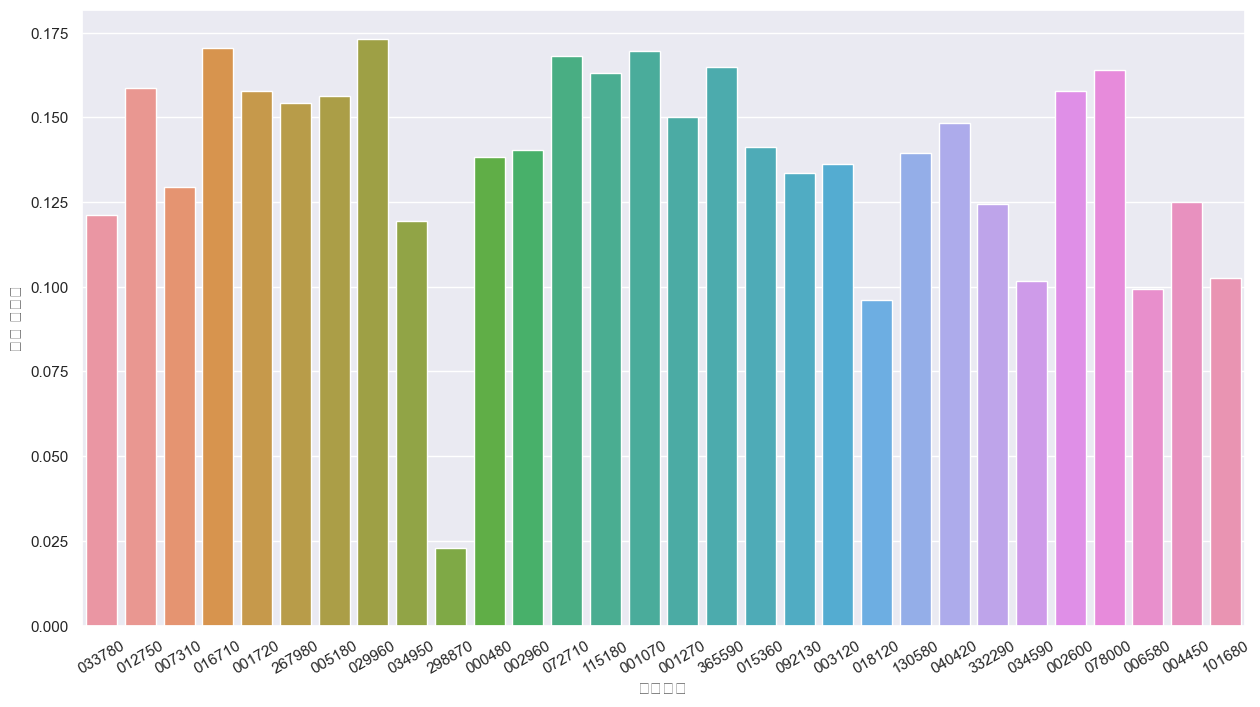

In [309]:
# 변동성이 0인 종목은 거래정지로 인해 가격이 변하지 않음. -> NA 처리
std_12m_weekly[std_12m_weekly==0] = np.nan

# 변동성 하위 30종목 시각화
low_std_30_weekly = std_12m_weekly[std_12m_weekly.rank(method='min', ascending=True, na_option='keep') <= 30]
low_std_30_weekly = low_std_30_weekly.reset_index()
low_std_30_weekly.columns = ['종목코드', '주간 변동성']
g = sns.barplot(x='종목코드', y='주간 변동성', data=low_std_30_weekly)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
g

In [310]:
# 주간 저변동 포트폴리오
low_std_30_weekly['종목명'] = KOR_ticker.set_index('종목코드').loc[low_std_30_weekly['종목코드'], '종목명'].tolist()
low_std_30_weekly

,종목코드,주간 변동성,종목명
0,033780,0.121123,KT&G
1,012750,0.158592,에스원
2,007310,0.129541,오뚜기
3,016710,0.170545,대성홀딩스
4,001720,0.157844,신영증권
5,267980,0.154204,매일유업
6,005180,0.156161,빙그레
7,029960,0.173183,코엔텍
8,034950,0.119553,한국기업평가
9,298870,0.022757,다올인베스트먼트


## 월간 저변동

<AxesSubplot:xlabel='std', ylabel='count'>

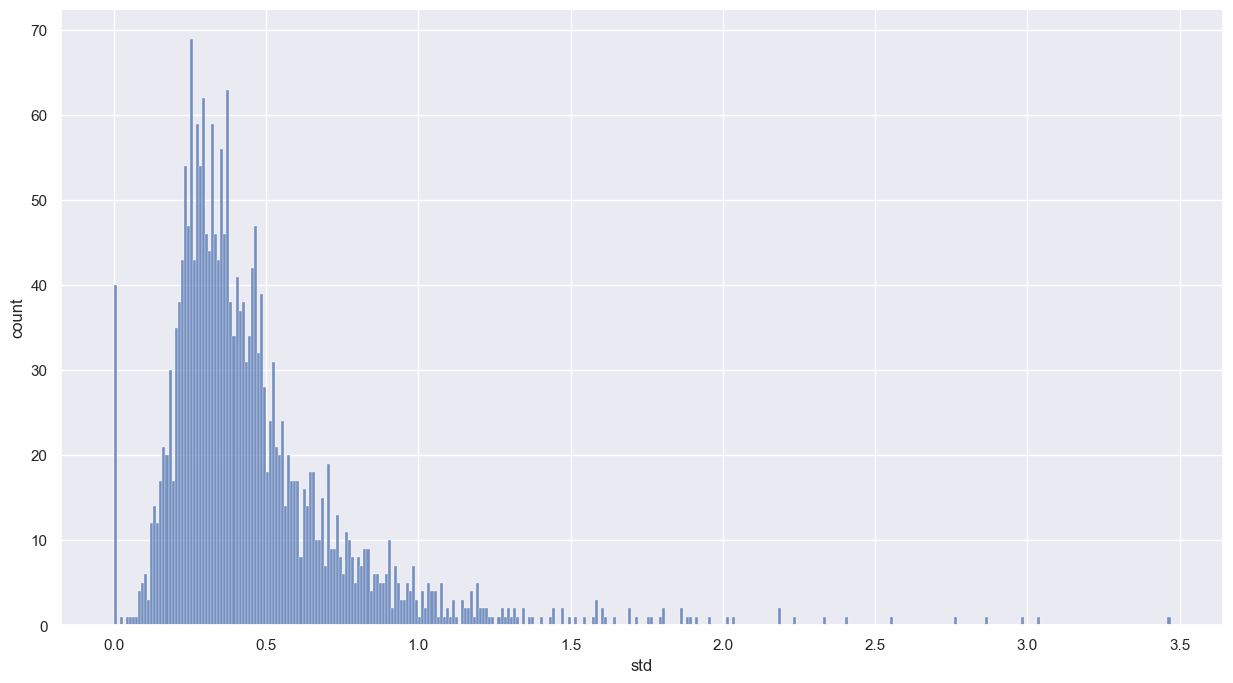

In [311]:
prices = pd.read_csv('data/KOR_price_2021.csv', encoding='cp949')
prices['Date'] = pd.to_datetime(prices['Date'])
prices = prices.set_index('Date')

# 월간 수익률
price_monthly = pd.concat([prices[:1], prices.asfreq('M', method='ffill')])
ret_monthly = price_monthly.pct_change()

# 연율화 변동성
std_12m_monthly = ret_monthly.std(axis=0).dropna() * sqrt(len(ret_monthly)-1)
ax = sns.histplot(x=std_12m_monthly, binwidth=0.01)
ax.set(xlabel='std', ylabel='count')
ax

<AxesSubplot:xlabel='종목코드', ylabel='주간 변동성'>

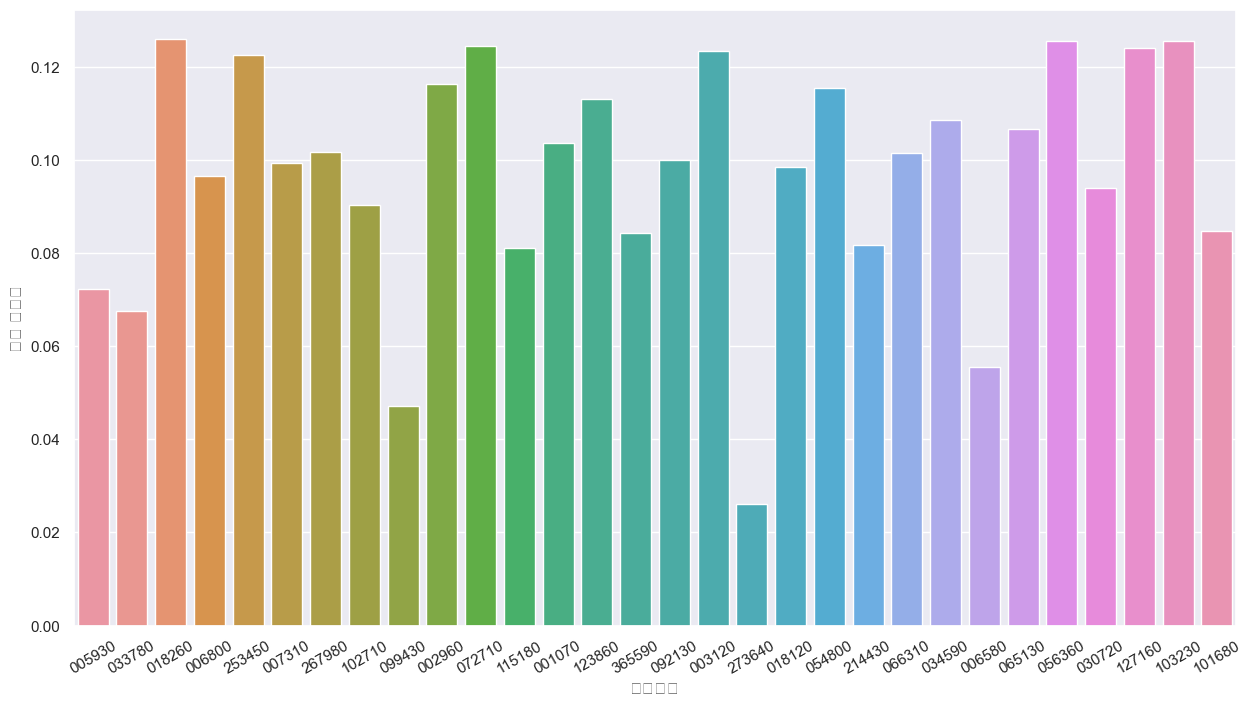

In [312]:
# 변동성이 0인 종목은 거래정지로 인해 가격이 변하지 않음. -> NA 처리
std_12m_monthly[std_12m_monthly==0] = np.nan

# 변동성 하위 30종목 시각화
low_std_30_monthly = std_12m_monthly[std_12m_monthly.rank(method='min', ascending=True, na_option='keep') <= 30]
low_std_30_monthly = low_std_30_monthly.reset_index()
low_std_30_monthly.columns = ['종목코드', '주간 변동성']
g = sns.barplot(x='종목코드', y='주간 변동성', data=low_std_30_monthly)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
g

In [313]:
# 월간 저변동 포트폴리오
low_std_30_monthly['종목명'] = KOR_ticker.set_index('종목코드').loc[low_std_30_monthly['종목코드'], '종목명'].tolist()
low_std_30_monthly

,종목코드,주간 변동성,종목명
0,005930,0.072373,삼성전자
1,033780,0.067667,KT&G
2,018260,0.126160,삼성에스디에스
3,006800,0.096759,미래에셋증권
4,253450,0.122743,스튜디오드래곤
5,007310,0.099394,오뚜기
6,267980,0.101927,매일유업
7,102710,0.090416,이엔에프테크놀로지
8,099430,0.047263,바이오플러스
9,002960,0.116502,한국쉘석유


## 주기별 저변동 포트폴리오 교집합

In [314]:
print("inter_daily_weekly:", set(low_std_30_weekly['종목명']) & set(low_std_30['종목명']))
print("inter_daily_monthly:", set(low_std_30_monthly['종목명']) & set(low_std_30['종목명']))
print("inter_all:", set(low_std_30_monthly['종목명']) & set(low_std_30_weekly['종목명']) & set(low_std_30['종목명']))

inter_daily_weekly: {'인천도시가스', '대양제지', '진로발효', '부국증권', '삼화왕관', '이크레더블', '한국기업평가', '누보', '신영증권', '예스코홀딩스', '조선내화', '오뚜기', '농심홀딩스', '일성신약', '빙그레', '코엔텍', '매일유업', 'KT&G', '한국쉘석유', '에스원', '정상제이엘에스', '나이스디앤비', '대성홀딩스', '대한방직', '텔코웨어'}
inter_daily_monthly: {'KT&G', '인천도시가스', '한국쉘석유', '농심홀딩스', '대양제지', '일성신약', '진로발효', '대한방직', '오뚜기', '이크레더블', '매일유업'}
inter_all: {'KT&G', '인천도시가스', '한국쉘석유', '농심홀딩스', '대양제지', '일성신약', '진로발효', '대한방직', '오뚜기', '이크레더블', '매일유업'}


# 모멘텀 효과

- 이익 모멘텀 : 기업 이익의 추세
- 가격 모멘텀 : 주가의 모멘텀 (흔히 중기모멘텀)
    - 단기 모멘텀 : 1주일 ~ 1달
    - 중기 모멘텀 : 3개월 ~ 12개월
    - 장기 모멘텀 : 3년 ~ 5년

In [338]:
# 주가 정보
prices = pd.read_csv('data/KOR_price_2021.csv', encoding='cp949')
prices['Date'] = pd.to_datetime(prices['Date'])
prices = prices.set_index('Date')
prcies = prices.applymap(float)

# 수익률
ret = prcies.pct_change()

# 누적 수익률(일별)
ret_12m = prices.rebase(1) - 1
display(ret_12m)

# 누적 수익률(전체 기간)
ret_12m = (ret+1).prod(axis=0) - 1

,005930,373220,000660,207940,051910,035420,006400,005380,000270,035720,...,038340,033790,101680,058220,078650,121890,058420,347140,050540,176440
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
2021-01-05,0.010843,NaN,0.035714,0.003619,0.004499,-0.001706,0.022355,0.009639,-0.004687,-0.007574,...,0.004545,0.0,-0.006211,0.0,0.010033,0.0,-0.101083,0.000000,0.0,0.0
2021-01-06,-0.009639,NaN,0.039683,-0.014476,0.001125,-0.010239,0.013413,-0.021687,-0.028125,-0.001258,...,0.052273,0.0,0.003106,0.0,0.030142,0.0,-0.151986,-0.002433,0.0,0.0
2021-01-07,-0.001205,NaN,0.067460,-0.012063,0.082115,-0.011945,0.040238,-0.007229,-0.015625,0.016419,...,0.054545,0.0,-0.003106,0.0,0.025104,0.0,-0.197473,-0.002433,0.0,0.0
2021-01-08,0.069880,NaN,0.095238,0.009650,0.123735,0.064846,0.101341,0.185542,0.067187,0.095970,...,0.043182,0.0,-0.003106,0.0,0.005039,0.0,-0.268231,-0.002433,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,-0.030120,NaN,0.015873,0.067551,-0.301462,0.310580,-0.029806,0.038554,0.329687,0.440560,...,-0.797727,0.0,-0.105590,0.0,-0.682971,0.0,-0.220217,0.002433,0.0,0.0
2021-12-27,-0.033735,NaN,0.000000,0.068758,-0.294713,0.298635,-0.040238,0.028916,0.325000,0.421688,...,-0.797727,0.0,-0.105590,0.0,-0.687430,0.0,-0.220217,0.004866,0.0,0.0
2021-12-28,-0.032530,NaN,0.011905,0.074788,-0.289089,0.312287,-0.029806,0.031325,0.320312,0.427978,...,-0.797727,0.0,-0.105590,0.0,-0.709279,0.0,-0.220217,0.009732,0.0,0.0


In [358]:
# 누적 수익률 
invest_mom  = ret_12m[(ret_12m.rank(ascending=False, na_option='keep') <= 30).tolist()].reset_index()
invest_mom.columns = ['종목코드', '21년도 누적수익률']
invest_mom['종목명'] = KOR_ticker.set_index('종목코드').loc[invest_mom['종목코드'], '종목명'].tolist()
invest_mom = invest_mom[['종목코드', '종목명', '21년도 누적수익률']]
invest_mom = invest_mom.sort_values('21년도 누적수익률', ascending=False)
invest_mom

,종목코드,종목명,21년도 누적수익률
5,101730,위메이드맥스,15.027634
10,136510,에디슨EV,12.170224
1,112040,위메이드,8.231009
6,194480,데브시스터즈,6.060403
4,299900,위지윅스튜디오,5.450567
11,063080,컴투스홀딩스,5.308101
7,256840,한국비엔씨,5.142692
15,042420,네오위즈홀딩스,4.871951
18,013360,일성건설,4.452174
14,291230,엔피,4.271291


## 위험조정 수익률

단순히 과거 수익률로만 모멘텀 종목을 선택하면 각종 테마나 이벤트에 따른 급등으로 인해 변동성이 지나치게 높은 종목이 있을 수도 있습니다. 누적수익률을 변동성으로 나누어 위험을 고려해줄 경우, 이러한 종목은 제외되며 상대적으로 안정적인 모멘텀 종목을 선택할 수 있습니다.

In [346]:
std_12m

005930    0.013690
373220         NaN
000660    0.022547
207940    0.020767
051910    0.025453
            ...   
121890    0.000000
058420    0.031289
347140    0.029771
050540    0.000000
176440    0.000000
Length: 2268, dtype: float64

In [373]:
ret = prices.pct_change()
std_12m  = ret.std(axis=0) * sqrt(len(ret)-1)
ret_12m = (ret+1).prod(axis=0)-1
sharpe_12m = ret_12m / std_12m
sharpe_12m

005930   -0.263188
373220         NaN
000660    0.111985
207940    0.273501
051910   -0.770472
            ...   
121890         NaN
058420   -0.447828
347140    0.062402
050540         NaN
176440         NaN
Length: 2268, dtype: float64

In [375]:
invest_mom_sharpe = sharpe_12m[sharpe_12m.rank(ascending=False) <= 30].reset_index()
invest_mom_sharpe.columns = ['종목코드', '21년도 위험조정 누적수익률']
invest_mom_sharpe['종목명'] = KOR_ticker.set_index('종목코드').loc[invest_mom_sharpe['종목코드'].tolist(), '종목명'].tolist()
invest_mom_sharpe['수익률'] = round(ret_12m[invest_mom_sharpe['종목코드']], 2).tolist()
invest_mom_sharpe['변동성'] = round(std_12m[invest_mom_sharpe['종목코드']], 2).tolist()
invest_mom_sharpe = invest_mom_sharpe[['종목코드', '종목명', '수익률', '변동성', '21년도 위험조정 누적수익률']]

display(ret_12m.describe())
display(std_12m.describe())
display(invest_mom_sharpe.sort_values('21년도 위험조정 누적수익률', ascending=False))

count    2268.000000
mean        0.176086
std         0.747466
min        -0.925108
25%        -0.170694
50%         0.024784
75%         0.294094
max        15.027634
dtype: float64

count    2244.000000
mean        0.492523
std         0.201554
min         0.000000
25%         0.359005
50%         0.467262
75%         0.603987
max         1.834956
dtype: float64

,종목코드,종목명,수익률,변동성,21년도 위험조정 누적수익률
11,101730,위메이드맥스,15.03,1.06,14.169818
4,112040,위메이드,8.23,0.95,8.677307
3,138040,메리츠금융지주,3.55,0.41,8.637985
19,136510,에디슨EV,12.17,1.44,8.478588
10,299900,위지윅스튜디오,5.45,0.68,7.973472
20,063080,컴투스홀딩스,5.31,0.83,6.387592
12,003100,선광,1.11,0.20,5.529561
14,194480,데브시스터즈,6.06,1.14,5.339076
7,016710,대성홀딩스,0.86,0.17,5.053568
23,042420,네오위즈홀딩스,4.87,0.97,5.023322


In [377]:
set(invest_mom['종목명']) & set(invest_mom_sharpe['종목명'])

{'네오위즈홀딩스',
 '데브시스터즈',
 '덱스터',
 '메리츠금융지주',
 '서울옥션',
 '셀바스AI',
 '에디슨EV',
 '엔피',
 '위메이드',
 '위메이드맥스',
 '위지윅스튜디오',
 '일성건설',
 '자이언트스텝',
 '컴투스홀딩스',
 '플레이그램',
 '플리토',
 '한국비엔씨',
 '한전기술',
 '효성첨단소재'}

## 포트폴리오 시각화

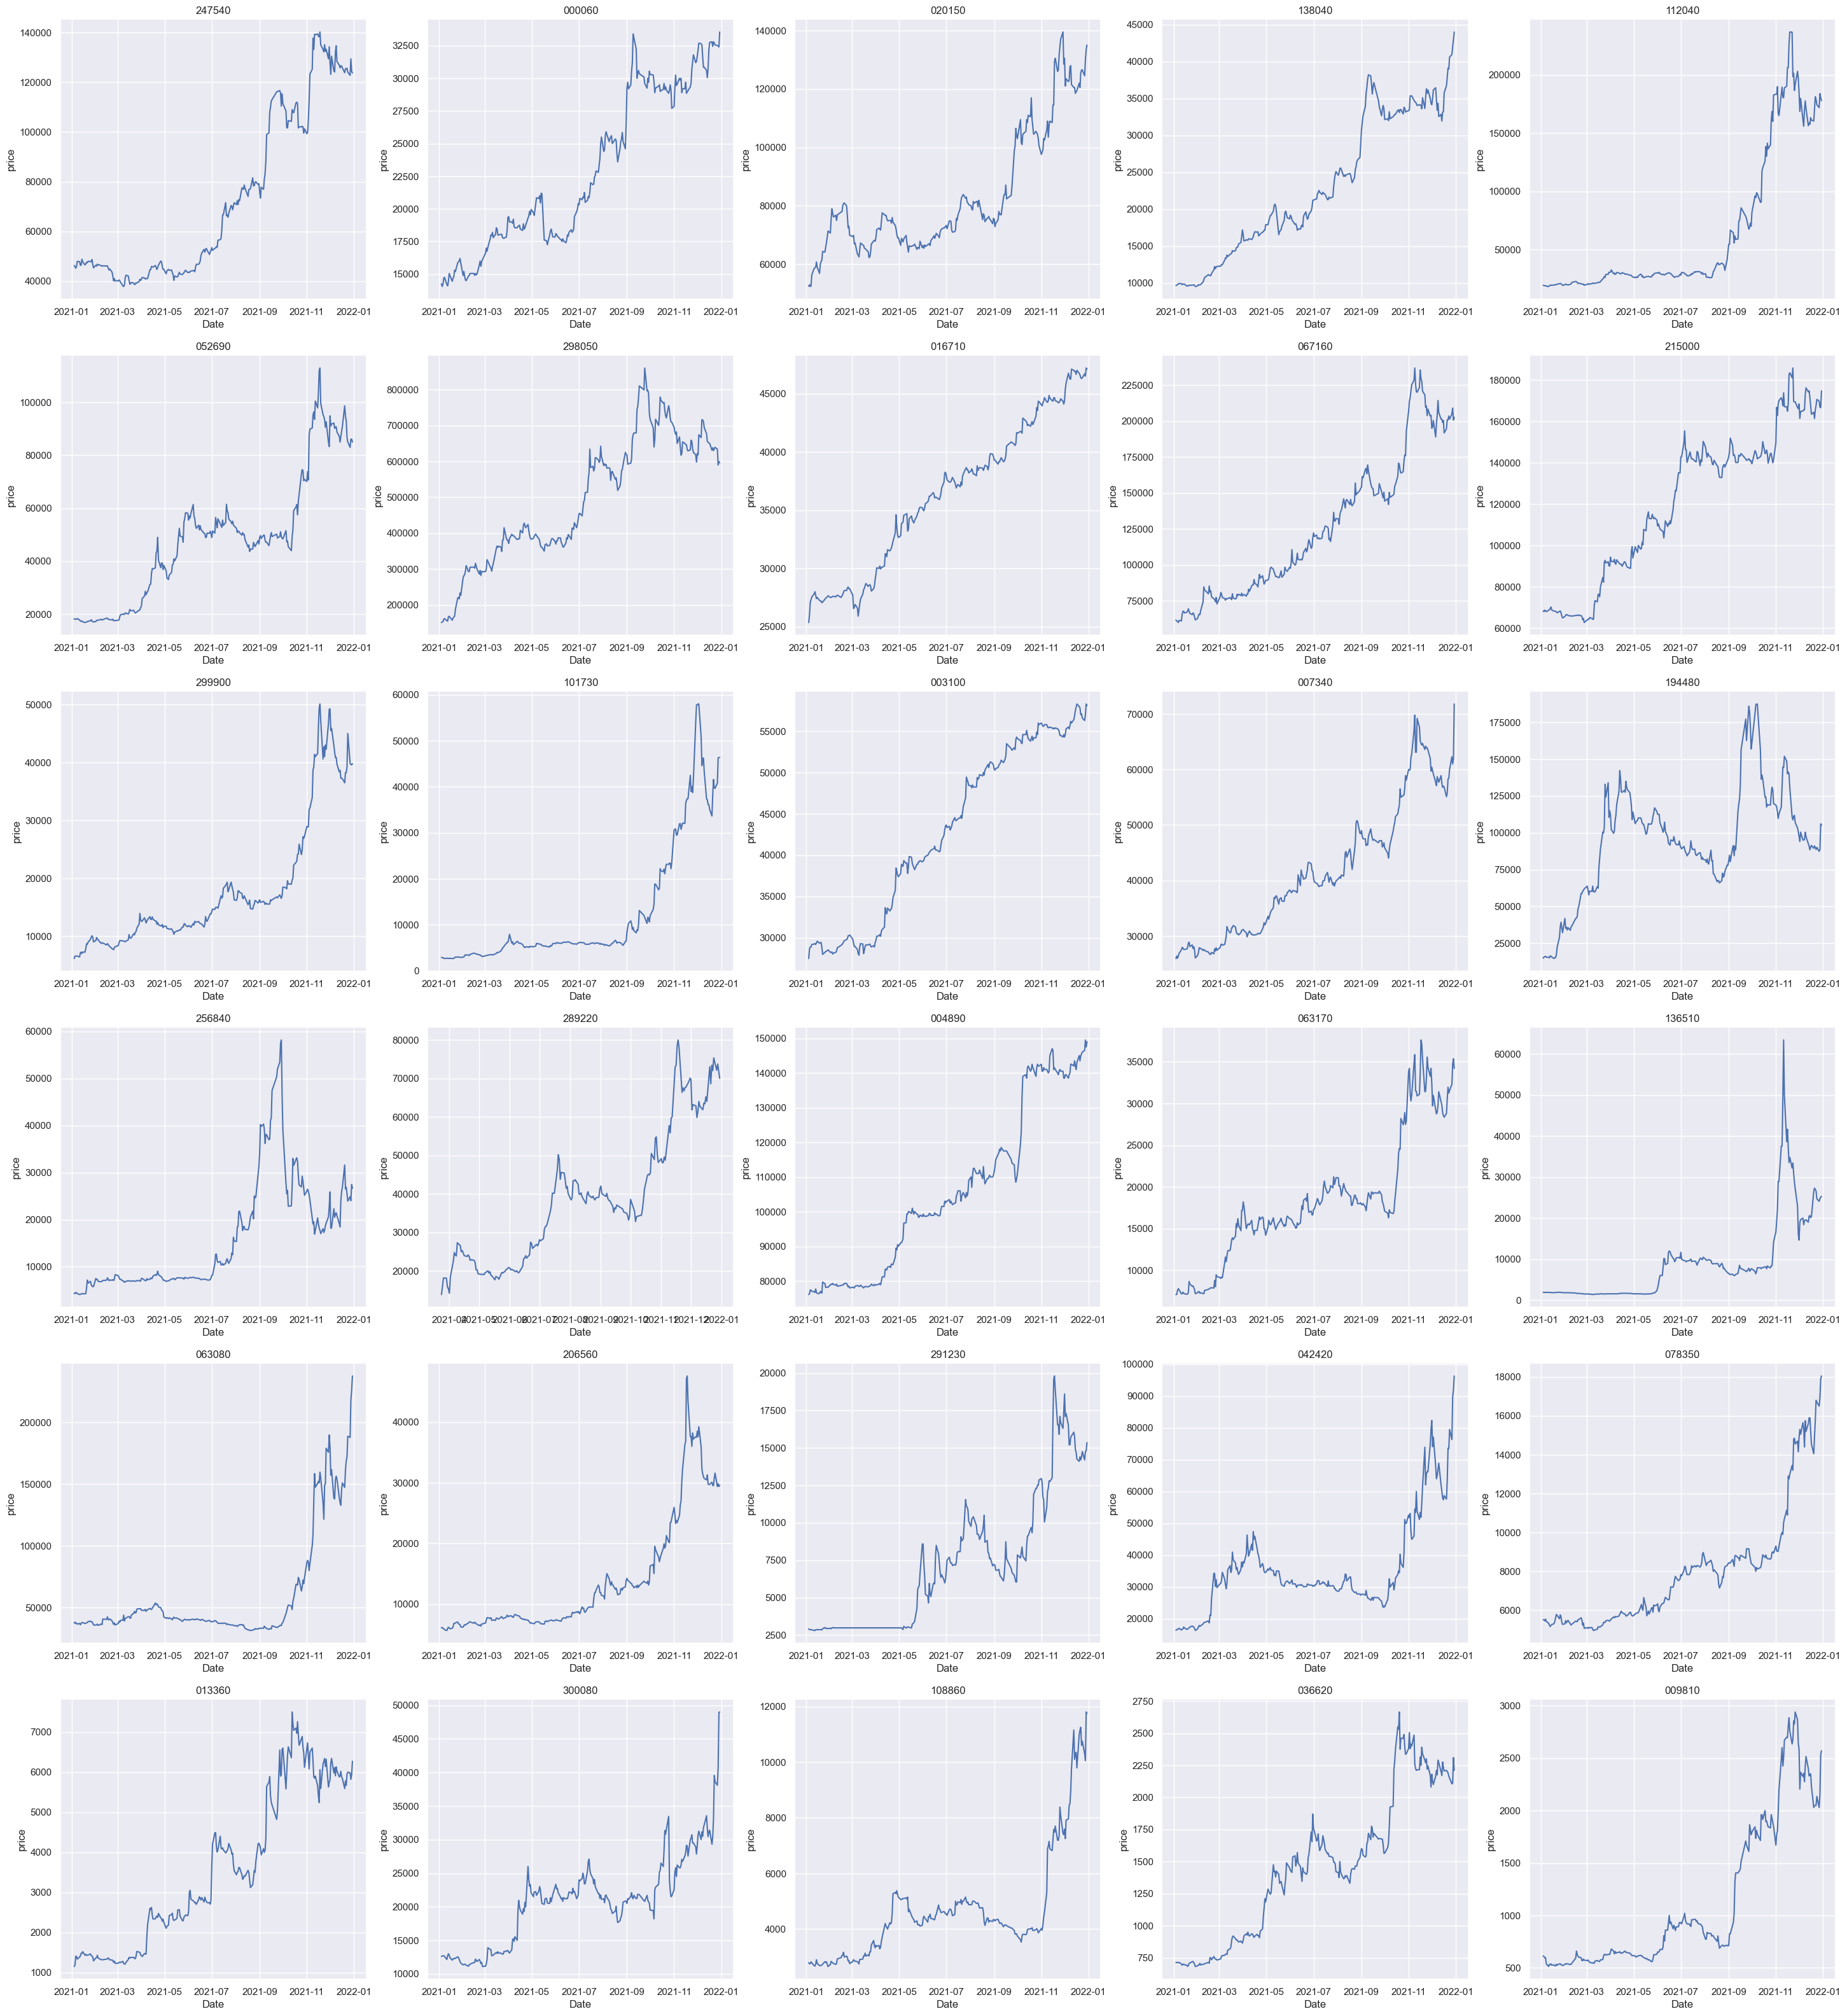

In [402]:
import matplotlib.pyplot as plt

ncols = 5
nrows = int(len(invest_mom_sharpe['종목코드'].unique())/ncols)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6*nrows, 8*ncols))
ax = ax.flatten()

viz_df = pd.DataFrame()
for i, code in enumerate(invest_mom_sharpe['종목코드']):
    data = prcies[code].reset_index()
    data.columns = ['Date', 'price']
    g = sns.lineplot(data=data, x='Date', y='price', ax=ax[i])
    g.set(title=code)

# 벨류 전략

## 저BPR 포트폴리오 구하기

In [414]:
code_template = '{0:06d}'
KOR_ticker = pd.read_csv('data/KOR_ticker.csv', encoding='cp949')
KOR_value = pd.read_csv('data/KOR_value.csv', encoding='cp949')

KOR_ticker['종목코드'] = KOR_ticker['종목코드'].apply(lambda x: code_template.format(x))
KOR_value['종목코드'] = KOR_value['종목코드'].apply(lambda x: code_template.format(x))

invest_pbr = KOR_value[KOR_value['PBR'].rank(ascending=True) <= 30]
invest_pbr['종목명'] = KOR_ticker.set_index('종목코드').loc[invest_pbr['종목코드'].tolist(), '종목명'].tolist()
invest_pbr = invest_pbr[['종목코드', '종목명', 'PBR']]
invest_pbr

,종목코드,종목명,PBR
125,001040,CJ,0.138411
139,088350,한화생명,0.147887
143,000880,한화,0.092063
213,000150,두산,0.132625
289,023590,다우기술,0.175909
461,012630,HDC,0.082063
474,032190,다우데이타,0.085769
484,058650,세아홀딩스,0.132737
510,003300,한일홀딩스,0.174924
523,071320,지역난방공사,0.196557


## 4P (PER, PBR, PCR, PSR)

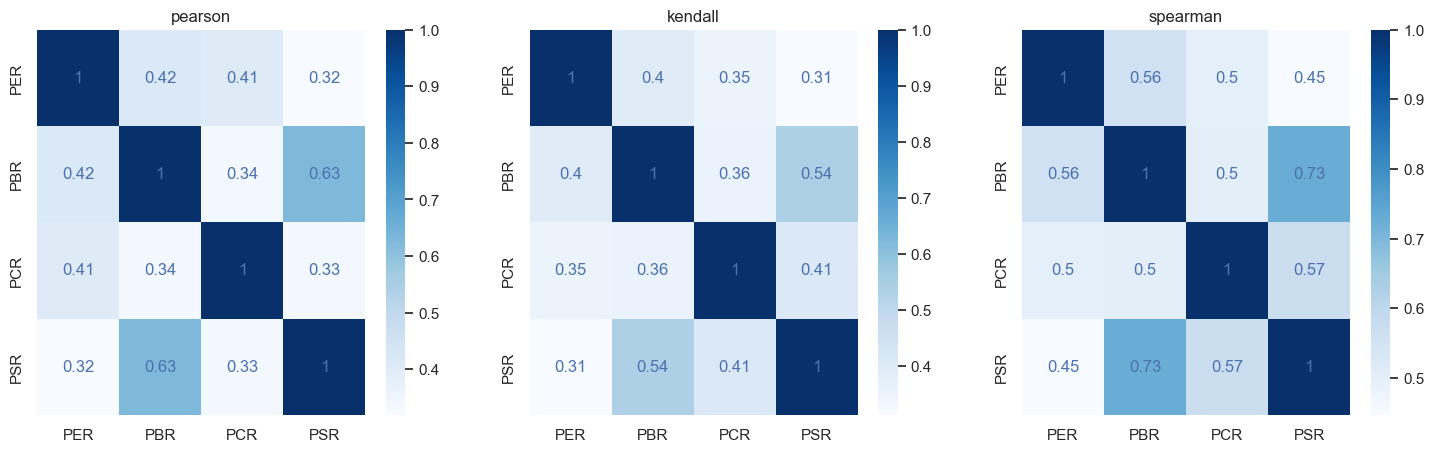

In [451]:
rank_value = KOR_value.rank(ascending=True, na_option='bottom', axis=0)
corr_p = rank_value.corr(method='pearson') # 두 변수 간의 선형 상관관계
corr_k = KOR_value.corr(method='kendall') # 두 변수들간의 순위를 비교해서 연관성
corr_s = KOR_value.corr(method='spearman') # 두 변수의 순위 값 사이의 피어슨 상관 계수

fig, ax = plt.subplots(ncols=3, figsize=(18, 5))
for i, (corr, method) in enumerate(zip([corr_p, corr_k, corr_s], ['pearson', 'kendall', 'spearman'])):
    g = sns.heatmap(corr, annot=True, annot_kws=dict(color='b'), cmap='Blues', ax=ax[i])
    g.set(title=method)

In [459]:
# 포트폴리오
rank_sum = rank_value.sum(axis=1).sort_values()
invest_value = rank_sum[rank_sum.rank(ascending=True, na_option='bottom') <= 30]
invest_value = pd.concat([
    round(KOR_value.loc[invest_value.index.tolist(), :], 2),
    KOR_ticker.set_index('종목코드').loc[invest_value.index.tolist(), :]['종목명']
    ], axis=1).reset_index()[['종목코드', '종목명', 'PER', 'PBR', 'PCR', 'PSR']]

In [461]:
# 저 pbr & 저 4p
set(invest_pbr['종목명']) & set(invest_value['종목명'])

{'CJ', 'KISCO홀딩스', 'SNT홀딩스', '넥센', '두산', '매일홀딩스', '서연', '아세아', '한화'}

# 퀄리티 전략

## F-score

- 수익성
	- ROA > 0 then, +1
	- CFO > 0 then, +1
	- △ROA > 0 then, +1
	- CFA > ROA then, +1
#
- 재무 성과
	- △LEVER < 0 then, +1 (레버리지 감소)
	- △LIQUID > 0 then, +1 (유동성 증가)
	- △EQ_OFFER < 0 then, +1 (발행주식수 감소)
#
- 운영 효율성
	- △MARGIN > 0 then, +1 (매출총이익률 증가)
	- △TRUN > 0 then, +1 (회전율 증가)

In [508]:
code_template = '{0:06d}'

with open('data/KOR_fs.json', 'r') as f:
    KOR_fs = json.load(f)

# 재무정보
fs_yearly = {}
for year, acc_code_value in KOR_fs.items():
    fs_yearly[year] = pd.concat(
        [pd.DataFrame(code_value.values(), index= code_value.keys(), columns=[account]) for account, code_value in acc_code_value.items()], axis=1)

# Ticker
KOR_ticker = pd.read_csv('data/KOR_ticker.csv', encoding='cp949')
KOR_ticker['종목코드'] = KOR_ticker['종목코드'].apply(lambda x: code_template.format(x))


print(fs_yearly.keys())
display(fs_yearly[year].head())
display(KOR_ticker.head())

dict_keys(['2019/12', '2020/12', '2021/12'])


,매출액,매출원가,매출총이익,판매비와관리비,인건비,유무형자산상각비,연구개발비,광고선전비,판매비,관리비,...,자기주식의취득,자본구성항목의감소,기타재무활동으로인한현금유출액,기타재무활동으로인한현금흐름,영업투자재무활동기타현금흐름,연결범위변동으로인한현금의증가,환율변동효과,현금및현금성자산의증가,기초현금및현금성자산,기말현금및현금성자산
005930,2796048.0,1664113.0,1131935.0,615596.0,75568.0,20731.0,224017.0,53760.0,131185.0,61926.0,...,NaN,273.0,NaN,205104.0,1.0,NaN,15820.0,96488.0,293826.0,390314.0
373220,2796048.0,1664113.0,1131935.0,615596.0,75568.0,20731.0,224017.0,53760.0,131185.0,61926.0,...,NaN,273.0,NaN,205104.0,1.0,NaN,15820.0,96488.0,293826.0,390314.0
000660,2796048.0,1664113.0,1131935.0,615596.0,75568.0,20731.0,224017.0,53760.0,131185.0,61926.0,...,NaN,273.0,NaN,205104.0,1.0,NaN,15820.0,96488.0,293826.0,390314.0
207940,2796048.0,1664113.0,1131935.0,615596.0,75568.0,20731.0,224017.0,53760.0,131185.0,61926.0,...,NaN,273.0,NaN,205104.0,1.0,NaN,15820.0,96488.0,293826.0,390314.0
051910,2796048.0,1664113.0,1131935.0,615596.0,75568.0,20731.0,224017.0,53760.0,131185.0,61926.0,...,NaN,273.0,NaN,205104.0,1.0,NaN,15820.0,96488.0,293826.0,390314.0


,종목코드,종목명,시장구분,업종명,종가,대비,등락률,시가총액,EPS,PER,선행 EPS,선행 PER,BPS,PBR,주당배당금,배당수익률
0,005930,삼성전자,KOSPI,전기전자,57600,-900,-1.54,343859474880000,5777.0,9.97,7075.0,8.14,43611.0,1.32,1444,2.51
1,373220,LG에너지솔루션,KOSPI,전기전자,401000,-12000,-2.91,93834000000000,3963.0,101.19,5072.0,79.06,39831.0,10.07,0,0.00
2,000660,SK하이닉스,KOSPI,전기전자,92200,-3000,-3.15,67121818053000,13989.0,6.59,17396.0,5.30,90394.0,1.02,1540,1.67
3,207940,삼성바이오로직스,KOSPI,의약품,817000,-4000,-0.49,58149158000000,5879.0,138.97,8156.0,100.17,74551.0,10.96,0,0.00
4,051910,LG화학,KOSPI,화학,553000,-15000,-2.64,39037565679000,47108.0,11.74,36213.0,15.27,278455.0,1.99,12000,2.17


In [522]:
fs

,매출액,매출원가,매출총이익,판매비와관리비,인건비,유무형자산상각비,연구개발비,광고선전비,판매비,관리비,...,자기주식의취득,자본구성항목의감소,기타재무활동으로인한현금유출액,기타재무활동으로인한현금흐름,영업투자재무활동기타현금흐름,연결범위변동으로인한현금의증가,환율변동효과,현금및현금성자산의증가,기초현금및현금성자산,기말현금및현금성자산
005930,2796048.0,1664113.0,1131935.0,615596.0,75568.0,20731.0,224017.0,53760.0,131185.0,61926.0,...,NaN,273.0,NaN,205104.0,1.0,NaN,15820.0,96488.0,293826.0,390314.0
373220,2796048.0,1664113.0,1131935.0,615596.0,75568.0,20731.0,224017.0,53760.0,131185.0,61926.0,...,NaN,273.0,NaN,205104.0,1.0,NaN,15820.0,96488.0,293826.0,390314.0
000660,2796048.0,1664113.0,1131935.0,615596.0,75568.0,20731.0,224017.0,53760.0,131185.0,61926.0,...,NaN,273.0,NaN,205104.0,1.0,NaN,15820.0,96488.0,293826.0,390314.0
207940,2796048.0,1664113.0,1131935.0,615596.0,75568.0,20731.0,224017.0,53760.0,131185.0,61926.0,...,NaN,273.0,NaN,205104.0,1.0,NaN,15820.0,96488.0,293826.0,390314.0
051910,2796048.0,1664113.0,1131935.0,615596.0,75568.0,20731.0,224017.0,53760.0,131185.0,61926.0,...,NaN,273.0,NaN,205104.0,1.0,NaN,15820.0,96488.0,293826.0,390314.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121890,2796048.0,1664113.0,1131935.0,615596.0,75568.0,20731.0,224017.0,53760.0,131185.0,61926.0,...,NaN,273.0,NaN,205104.0,1.0,NaN,15820.0,96488.0,293826.0,390314.0
058420,2796048.0,1664113.0,1131935.0,615596.0,75568.0,20731.0,224017.0,53760.0,131185.0,61926.0,...,NaN,273.0,NaN,205104.0,1.0,NaN,15820.0,96488.0,293826.0,390314.0
347140,2796048.0,1664113.0,1131935.0,615596.0,75568.0,20731.0,224017.0,53760.0,131185.0,61926.0,...,NaN,273.0,NaN,205104.0,1.0,NaN,15820.0,96488.0,293826.0,390314.0
050540,2796048.0,1664113.0,1131935.0,615596.0,75568.0,20731.0,224017.0,53760.0,131185.0,61926.0,...,NaN,273.0,NaN,205104.0,1.0,NaN,15820.0,96488.0,293826.0,390314.0


In [520]:
# F_score 지표 구하기
F_score_base = {}

for year, fs in fs_yearly.items():
    # 수익성
    ROA = fs['지배주주순이익'] / fs['자산']
    CFO = fs['영업활동으로인한현금흐름'] / fs['자산']
    ACCURUAL = CFO - ROA

    # 재무성과
    LEV = fs['장기차입금'] / fs['자산']
    LIQ = fs['유동자산'] / fs['유동부채']
    OFFER = fs['유상증자']

    # 운영 효율성
    MARGIN = fs['매출총이익'] / fs['매출액']
    TURN = fs['매출액'] / fs['자산']

    F_score_base[year] = pd.concat([ROA, CFO, ACCURUAL, LEV, LIQ, OFFER, MARGIN, TURN], axis=1)
    F_score_base[year].columns = ['ROA', 'CFO', 'ACCURUAL', 'LEV', 'LIQ', 'OFFER', 'MARGIN', 'TURN']

F_score_base['2021/12']

,0,1,2,3,4,유상증자,5,6
005930,0.091987,0.152607,0.06062,0.000004,2.475833,NaN,0.404834,0.655394
373220,0.091987,0.152607,0.06062,0.000004,2.475833,NaN,0.404834,0.655394
000660,0.091987,0.152607,0.06062,0.000004,2.475833,NaN,0.404834,0.655394
207940,0.091987,0.152607,0.06062,0.000004,2.475833,NaN,0.404834,0.655394
051910,0.091987,0.152607,0.06062,0.000004,2.475833,NaN,0.404834,0.655394
...,...,...,...,...,...,...,...,...
121890,0.091987,0.152607,0.06062,0.000004,2.475833,NaN,0.404834,0.655394
058420,0.091987,0.152607,0.06062,0.000004,2.475833,NaN,0.404834,0.655394
347140,0.091987,0.152607,0.06062,0.000004,2.475833,NaN,0.404834,0.655394
050540,0.091987,0.152607,0.06062,0.000004,2.475833,NaN,0.404834,0.655394


In [518]:
# F_score 구하기
crnt_year = '2021/12'
last_year = '2020/12'

F_1 = F_score_base[crnt_year]['ROA'] > 0
F_2 = F_score_base[crnt_year]['CFO'] > 0
F_3 = (F_score_base[crnt_year]['ROA'] - F_score_base[last_year]['ROA']) > 0
F_4 = F_score_base[crnt_year]['ACCURUAL'] > 0
F_5 = (F_score_base[crnt_year]['LEV'] - F_score_base[last_year]['LEV']) <= 0
F_6 = (F_score_base[crnt_year]['LIQ'] - F_score_base[last_year]['LIQ']) <= 0
F_7 = F_score_base[crnt_year]['OFFER'].isna() | (F_score_base[crnt_year]['OFFER'] <= 0)
F_8 = (F_score_base[crnt_year]['MARGIN'] - F_score_base[last_year]['MARGIN']) > 0
F_9 = (F_score_base[crnt_year]['TURN'] - F_score_base[last_year]['TURN']) > 0

F_score = pd.concat([F_1, F_2, F_3, F_4, F_5, F_6, F_7, F_8, F_9], axis=1)
F_score['F_score'] = F_score.sum(axis=1, skipna=True)
F_score['F_score'].value_counts()


8    2268
Name: F_score, dtype: int64

In [526]:
# 등급별 비율
F_score['F_score'].value_counts() / F_score['F_score'].value_counts().sum()

8    1.0
Name: F_score, dtype: float64

<AxesSubplot:>

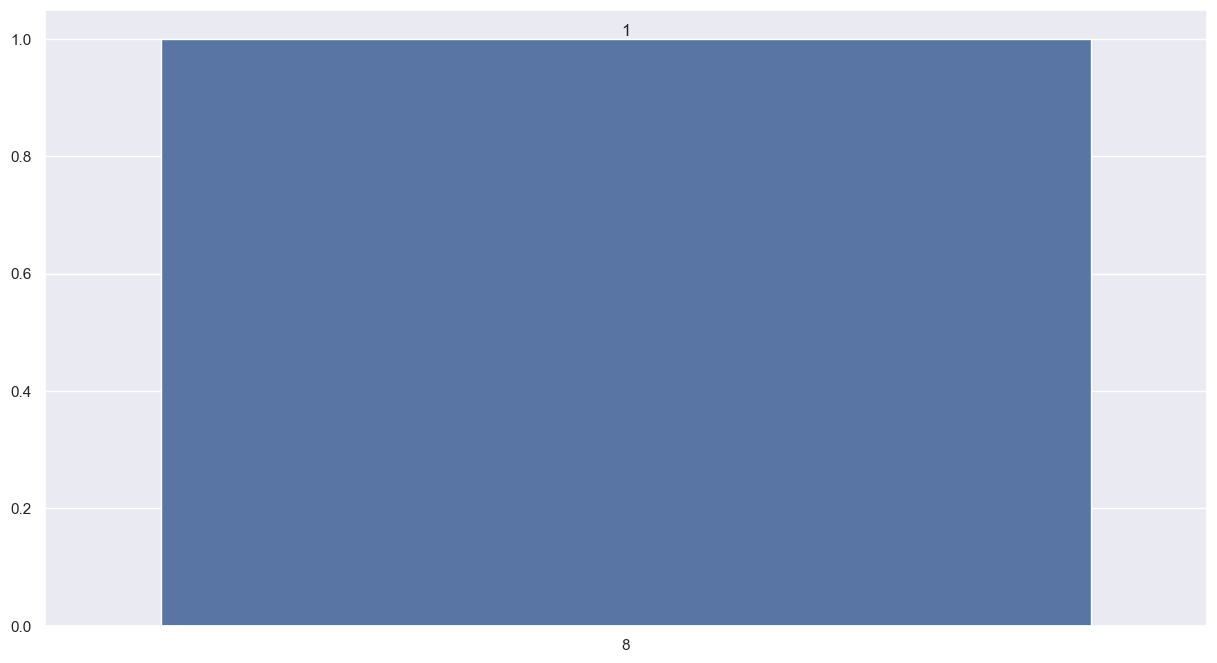

In [528]:
# 등급별 비율 시각화
rank_ratio = F_score['F_score'].value_counts() / F_score['F_score'].value_counts().sum()
g = sns.barplot(x=rank_ratio.index, y=rank_ratio.tolist())
g.bar_label(g.containers[0])
g

## ROE GPA CFO

In [529]:
code_template = '{0:06d}'

with open('data/KOR_fs.json', 'r') as f:
    KOR_fs = json.load(f)

# 재무정보
fs_yearly = {}
for year, acc_code_value in KOR_fs.items():
    fs_yearly[year] = pd.concat(
        [pd.DataFrame(code_value.values(), index= code_value.keys(), columns=[account]) for account, code_value in acc_code_value.items()], axis=1)

# Ticker
KOR_ticker = pd.read_csv('data/KOR_ticker.csv', encoding='cp949')
KOR_ticker['종목코드'] = KOR_ticker['종목코드'].apply(lambda x: code_template.format(x))


print(fs_yearly.keys())
display(fs_yearly[year].head())
display(KOR_ticker.head())

dict_keys(['2019/12', '2020/12', '2021/12'])


,매출액,매출원가,매출총이익,판매비와관리비,인건비,유무형자산상각비,연구개발비,광고선전비,판매비,관리비,...,자기주식의취득,자본구성항목의감소,기타재무활동으로인한현금유출액,기타재무활동으로인한현금흐름,영업투자재무활동기타현금흐름,연결범위변동으로인한현금의증가,환율변동효과,현금및현금성자산의증가,기초현금및현금성자산,기말현금및현금성자산
005930,2796048.0,1664113.0,1131935.0,615596.0,75568.0,20731.0,224017.0,53760.0,131185.0,61926.0,...,NaN,273.0,NaN,205104.0,1.0,NaN,15820.0,96488.0,293826.0,390314.0
373220,2796048.0,1664113.0,1131935.0,615596.0,75568.0,20731.0,224017.0,53760.0,131185.0,61926.0,...,NaN,273.0,NaN,205104.0,1.0,NaN,15820.0,96488.0,293826.0,390314.0
000660,2796048.0,1664113.0,1131935.0,615596.0,75568.0,20731.0,224017.0,53760.0,131185.0,61926.0,...,NaN,273.0,NaN,205104.0,1.0,NaN,15820.0,96488.0,293826.0,390314.0
207940,2796048.0,1664113.0,1131935.0,615596.0,75568.0,20731.0,224017.0,53760.0,131185.0,61926.0,...,NaN,273.0,NaN,205104.0,1.0,NaN,15820.0,96488.0,293826.0,390314.0
051910,2796048.0,1664113.0,1131935.0,615596.0,75568.0,20731.0,224017.0,53760.0,131185.0,61926.0,...,NaN,273.0,NaN,205104.0,1.0,NaN,15820.0,96488.0,293826.0,390314.0


,종목코드,종목명,시장구분,업종명,종가,대비,등락률,시가총액,EPS,PER,선행 EPS,선행 PER,BPS,PBR,주당배당금,배당수익률
0,005930,삼성전자,KOSPI,전기전자,57600,-900,-1.54,343859474880000,5777.0,9.97,7075.0,8.14,43611.0,1.32,1444,2.51
1,373220,LG에너지솔루션,KOSPI,전기전자,401000,-12000,-2.91,93834000000000,3963.0,101.19,5072.0,79.06,39831.0,10.07,0,0.00
2,000660,SK하이닉스,KOSPI,전기전자,92200,-3000,-3.15,67121818053000,13989.0,6.59,17396.0,5.30,90394.0,1.02,1540,1.67
3,207940,삼성바이오로직스,KOSPI,의약품,817000,-4000,-0.49,58149158000000,5879.0,138.97,8156.0,100.17,74551.0,10.96,0,0.00
4,051910,LG화학,KOSPI,화학,553000,-15000,-2.64,39037565679000,47108.0,11.74,36213.0,15.27,278455.0,1.99,12000,2.17


In [531]:
crnt_year = '2021/12'

quality_roe = fs_yearly[crnt_year]['지배주주순이익'] / fs_yearly[crnt_year]['자본']
quality_gpa = fs_yearly[crnt_year]['매출총이익'] / fs_yearly[crnt_year]['자산']
quality_cfo = fs_yearly[crnt_year]['영업활동으로인한현금흐름'] / fs_yearly[crnt_year]['자산']

quality_profit = pd.concat([quality_roe, quality_gpa, quality_cfo], axis=1)
quality_profit.columns = ['ROE', 'GPA', 'CFO']
quality_profit

,ROE,GPA,CFO
005930,0.12871,0.265326,0.152607
373220,0.12871,0.265326,0.152607
000660,0.12871,0.265326,0.152607
207940,0.12871,0.265326,0.152607
051910,0.12871,0.265326,0.152607
...,...,...,...
121890,0.12871,0.265326,0.152607
058420,0.12871,0.265326,0.152607
347140,0.12871,0.265326,0.152607
050540,0.12871,0.265326,0.152607


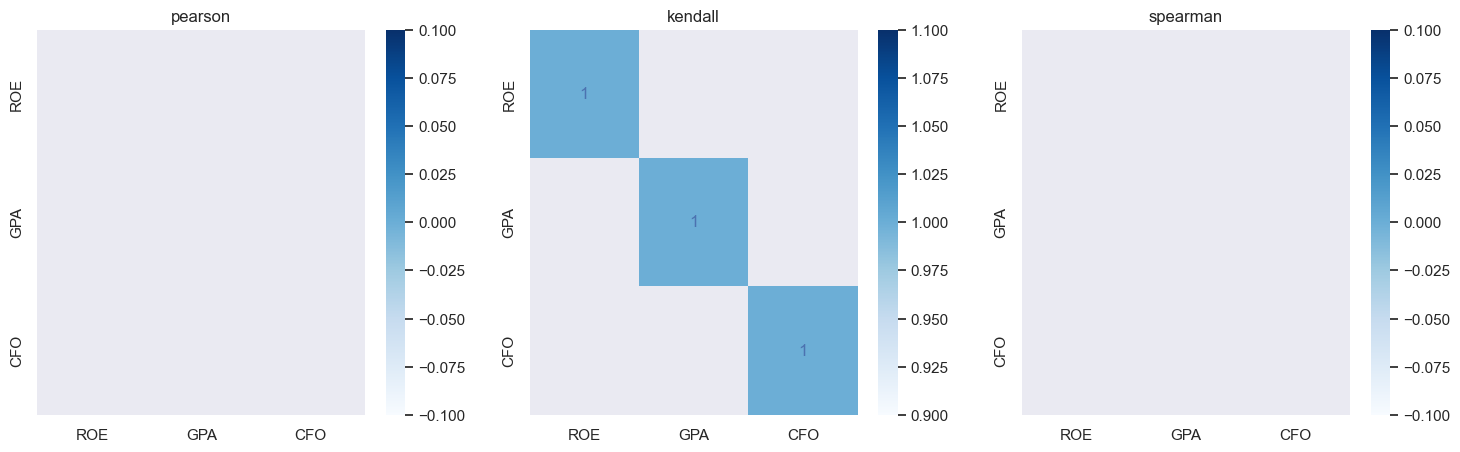

In [534]:
# 지표간 상관관계
corr_p = quality_profit.corr(method='pearson') # 두 변수 간의 선형 상관관계
corr_k = quality_profit.corr(method='kendall') # 두 변수들간의 순위를 비교해서 연관성
corr_s = quality_profit.corr(method='spearman') # 두 변수의 순위 값 사이의 피어슨 상관 계수

fig, ax = plt.subplots(ncols=3, figsize=(18, 5))
for i, (corr, method) in enumerate(zip([corr_p, corr_k, corr_s], ['pearson', 'kendall', 'spearman'])):
    g = sns.heatmap(corr, annot=True, annot_kws=dict(color='b'), cmap='Blues', ax=ax[i])
    g.set(title=method)

수익성 지표 역시 서로 간의 상관관계가 낮아, 지표를 통합적으로 고려 시 분산효과를 기대할 수 있습니다.

In [ ]:
# 지표별 순위 합산 상위 30종목 선택
rank_quality = profit_quality.rank(ascending=False)
rank_sum = rank_quality.sum(axis=1)

invest_quality = rank_sum.rank(ascending=True) <= 30

pd.concat(
    [KOR_ticker.set_index('종목코드').loc[
        rank_sum.sort_values(ascending=True).index.tolist(), ['종목명']],
    profit_quality], axis=1)

